### Unconditional density estmation with a neural spline flow
An example of unconditional density estimation, using the "two moons" distribution.

### Imports

In [1]:
import jax.numpy as jnp
from jax import random
from flowjax.flows import CouplingFlow
from flowjax.bijections.parameterised import Affine, RationalQuadraticSpline
from flowjax.train_utils import train_flow
from flowjax.distributions import Normal
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

### Generate data

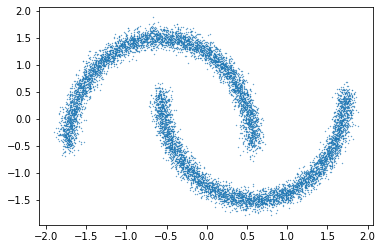

In [2]:
n_samples = 10000
n_bins = 100

scaler = preprocessing.StandardScaler()
x, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
x = scaler.fit_transform(x)
x = jnp.array(x)
plt.scatter(x[:, 0], x[:, 1], s=0.1)

### Create flows
We will create two coupling flows, one with `Affine` coupling layers (similar to [RealNVP](https://arxiv.org/abs/1605.08803)), and one with `RationalQuadraticSpline` coupling layers (similar to [neural spline flows](https://arxiv.org/abs/1906.04032))

In [3]:
key, *flow_keys = random.split(random.PRNGKey(0), 3) 

flows = {
    "Affine Coupling": CouplingFlow(flow_keys[0], Normal(x.shape[1]), Affine()),
    "Spline Coupling": CouplingFlow(flow_keys[1], Normal(x.shape[1]), RationalQuadraticSpline(K=8, B=3)),
}

 68%|██████▊   | 34/50 [00:20<00:09,  1.68it/s, train=1.43, val=1.46]

Max patience reached.


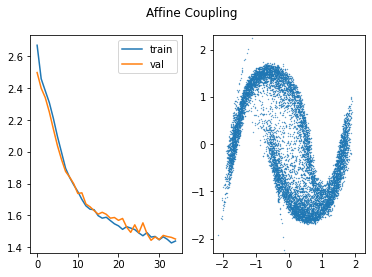

 66%|██████▌   | 33/50 [01:05<00:33,  1.98s/it, train=1.17, val=1.13]

Max patience reached.


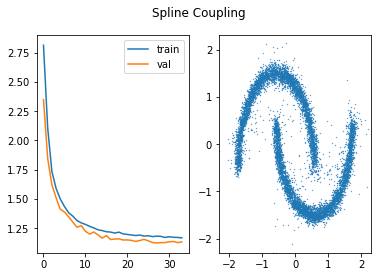

In [4]:

for flow_name, flow in flows.items():
    key, subkey = random.split(key)
    flow, losses = train_flow(subkey, flow, x)

    key, subkey = random.split(key)
    x_samples = flow.sample(key, n=10000)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(flow_name)

    for k, v in losses.items():
        ax1.plot(v, label=k)
    ax1.legend()

    ax2.scatter(x_samples[:, 0], x_samples[:, 1], s=0.1)
    lims = (-2.3, 2.3)
    ax2.set_xlim(*lims)
    ax2.set_ylim(*lims)
    plt.show()
